# **Training a Dense Embedding Model**


***



### **Objective: Develop embeddings that capture semantic relationships within the data..**

The goal is to train a dense embedding model to learn meaningful embeddings from the dataset that is extracted (from State Bank Of Pakistan) and pre-processed.
___

---
# **TASK 1: DATA PREPARATION**

### **STEP 01: EXTRACTING TEXT FILES**

In [ ]:
import zipfile
import os

# Path to the zip file (TEXT FILE HAVING 10 PAGES FROM ASSIGNMENT 01)
zip_path = '/content/TEXT FILES(10 PAGES).zip'
extract_path = '/content/text_files'

# Extracting the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Listing extracted files
print("Extracted files:")
print(os.listdir(extract_path))


Extracted files:
['TEXT FILES(10 PAGES)']





---

### **STEP 02: IMPORTING NECESSARY LIBRARIES**

In [ ]:
import nltk
nltk.download('punkt')

import os
import nltk

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import string
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

import gensim
from gensim.models import Word2Vec
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd
import random

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

---
### **STEP 03: PREPROCESSING THE TEXT**
- LOWER-CASING
- REMOVING PUNCTUATION
- CREATING LEMMAS
- Creating word tokens


In [ ]:
# Path to the directory containing text files
text_directory = "/content/text_files/TEXT FILES(10 PAGES)"

# Function to read all text files from a directory
def read_text_files(directory):
    text_data = []
    # List all files in the directory
    for filename in os.listdir(directory):
        # Full path to each file
        file_path = os.path.join(directory, filename)

        # Read the text file
        with open(file_path, 'r', encoding='utf-8') as file:
            text_data.append(file.read())  # Append the content to list
    return text_data




Processed Tokens for First Text File:
['function', 'of', 'sbp', 'like', 'a', 'central', 'bank', 'in', 'any', 'developing', 'country', 'state', 'bank', 'of', 'pakistan', 'performs', 'both', 'the', 'traditional', 'and', 'developmental', 'function', 'to', 'achieve', 'macro', 'economic', 'goal', 'the', 'traditional', 'function', 'which', 'are', 'generally', 'performed', 'by', 'central', 'bank', 'almost', 'all', 'over', 'the', 'world', 'may', 'be', 'classified', 'into', 'two', 'group', 'a', 'the', 'primary', 'function', 'including', 'issue', 'of', 'note', 'regulation', 'and', 'supervision', 'of', 'the', 'financial', 'system', 'banker', 'bank', 'lender', 'of', 'the', 'last', 'resort', 'banker', 'to', 'government', 'and', 'conduct', 'of', 'monetary', 'policy', 'and', 'b', 'the', 'secondary', 'function', 'including', 'the', 'agency', 'function', 'like', 'management', 'of', 'public', 'debt', 'management', 'of', 'foreign', 'exchange', 'etc', 'and', 'other', 'function', 'like', 'advising', 'the',

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
# Read text data from files
text_files_content = read_text_files(text_directory)

# Initializing lemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
# Preprocessing the text (normalize, tokenize, lemmatize)
processed_text = []
for text in text_files_content:
    #  Normalizing text (convert to lowercase and remove punctuation)
    normalized_text = text.lower()  # Convert to lowercase
    normalized_text = ''.join([char for char in normalized_text if char not in string.punctuation])  # Remove punctuation

    # Tokenizing text (split into words)
    tokens = word_tokenize(normalized_text)

    # Lemmatization (reduce words to their base form)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Adding the processed tokens to the list
    processed_text.append(lemmatized_tokens)

In [ ]:
# Displaying processed tokens for all 10 text-pages
for idx, tokens in enumerate(processed_text):
    print(f"Processed Tokens for Text Page {idx + 1}:")
    print(tokens)
    print("\n" + "="*50 + "\n")  # Separator between files


Processed Tokens for Text Page 1:
['function', 'of', 'sbp', 'like', 'a', 'central', 'bank', 'in', 'any', 'developing', 'country', 'state', 'bank', 'of', 'pakistan', 'performs', 'both', 'the', 'traditional', 'and', 'developmental', 'function', 'to', 'achieve', 'macro', 'economic', 'goal', 'the', 'traditional', 'function', 'which', 'are', 'generally', 'performed', 'by', 'central', 'bank', 'almost', 'all', 'over', 'the', 'world', 'may', 'be', 'classified', 'into', 'two', 'group', 'a', 'the', 'primary', 'function', 'including', 'issue', 'of', 'note', 'regulation', 'and', 'supervision', 'of', 'the', 'financial', 'system', 'banker', 'bank', 'lender', 'of', 'the', 'last', 'resort', 'banker', 'to', 'government', 'and', 'conduct', 'of', 'monetary', 'policy', 'and', 'b', 'the', 'secondary', 'function', 'including', 'the', 'agency', 'function', 'like', 'management', 'of', 'public', 'debt', 'management', 'of', 'foreign', 'exchange', 'etc', 'and', 'other', 'function', 'like', 'advising', 'the', 'go

___
---
---
# **TASK 2: MODEL SELECTION**

- Choosing Word2Vec dense embedding model


#### **Reason for Chosing Word2Vec**

After considering both models, I decided to go with **Word2Vec**. Here's why:
- **Better for Capturing Word Relationships**: Word2Vec works well for understanding how words are related based on their context in the text. This is exactly what we need for learning meaningful word embeddings.
- **Works Well with Smaller Datasets**: Since my dataset isn’t huge (10 page having 15-20 lines each rougly), Word2Vec is a good choice. It can still provide high-quality embeddings without needing a massive amount of data.
- **Flexibility**: Word2Vec lets me easily set the embedding dimension (30 in this case) and is quick to train, which makes it ideal for this project.

While **GloVe** has some great features, like capturing global context and providing pretrained embeddings, **Word2Vec** is better suited for our needs. It allows the embeddings to be learned directly from the dataset, creating more tailored and relevant representations of the words.

#### **Embedding Dimension**

The embedding dimension is set to **30**, which is a reasonable size. It’s large enough to capture the necessary semantic relationships.

In conclusion, I chose **Word2Vec** because it effectively captures word relationships based on context, is flexible, and works well with the dataset I have.

___

---
---
---
# **Step 3: Training the Word2Vec Model**


### ***Word2Vec Hyperparameters***
Defining the important hyperparameters for training the Word2Vec model:

- **vector_size**: The dimension of the word embeddings. We set this to 30.
- **window:** This defines the context window size. We will set it to 5 (looking at the 5 words before and after a target word).
- **min_count**: We will set this to 1 to ensure that all words are included.
- **sg**: This specifies the training algorithm. We will use Skip-gram (sg=1), which works better for smaller datasets.
- **negative:** The number of negative samples used for training. We'll use 5.

---
## ***Initializing and training the Word2Vec model***


In [ ]:
model = Word2Vec(sentences=processed_text,  # Input data (processed tokens)
                 vector_size=30,           # Dimensionality of word vectors (embedding size)
                 window=5,                 # Context window size (look at 5 words before and after)
                 min_count=1,              # Ignoring words that appear less than 1 time
                 sg=1,                     # Using Skip-gram approach
                 negative=5,               # Negative sampling to speed up training
                 workers=4,                # Number of CPU cores to use for training
                 epochs=10)                # Number of training epochs

In [ ]:
# Saving the trained model for later use
model.save("/content/word2vec_model")

# saving the each vector separately
word_vectors = model.wv

## ***DISPLAYING THE SUMMARY OF TRAINED MODEL***


In [ ]:
print("Training complete. Model summary:")
print(f"Vocabulary size: {len(word_vectors)}")  # Number of words in the vocabulary
print(f"Embedding dimension: {model.vector_size}")  # Embedding dimension (30)


Training complete. Model summary:
Vocabulary size: 1030
Embedding dimension: 30


## ***DISPLAYING THE GENERATED EMBEDDINGS FOR EACH WORD IN VOCABULARY***

In [ ]:
# Creating Function to display embeddings for each word in the vocabulary
def display_embeddings(model):
    # Getting the vocabulary from the trained Word2Vec model
    vocabulary = list(model.wv.index_to_key)  # List of words in the vocabulary

    # Iterating through all words and display their embeddings
    for word in vocabulary:
        # Getting the embedding vector for the word
        embedding = model.wv[word]

        # Displaying the word and its embedding (vector of 30 dimensions)
        print(f"Word: {word}")
        print(f"Embedding: {embedding}")
        print("-" * 60)  # Separator between words

# Calling the function to display embeddings for all words in the vocabulary
display_embeddings(model)


Streaming output truncated to the last 5000 lines.
 -0.04883192 -0.2319673  -0.0278969  -0.08645684  0.17396663  0.19692002
 -0.25402492 -0.04531376  0.0076581   0.02058659  0.07925735  0.31452945
  0.1660651   0.21097735  0.16413239  0.07817757  0.07739046 -0.43739498]
------------------------------------------------------------
Word: establishment
Embedding: [ 0.00449023 -0.18304771  0.30281922 -0.01379691  0.15134111  0.05048377
  0.1841271  -0.05168889 -0.26108673  0.13177988  0.25305444  0.13060911
  0.00621787 -0.18878612 -0.09528156 -0.09594573  0.11719318  0.14666538
 -0.23885758 -0.02459723 -0.02772012  0.07788771  0.09332031  0.27844417
  0.153574    0.20845813  0.1871758   0.10899262  0.10172344 -0.43500626]
------------------------------------------------------------
Word: equipment
Embedding: [-1.9133167e-02 -1.9931409e-01  2.7936691e-01 -1.5767252e-02
  1.6777515e-01  5.4180156e-02  1.8822114e-01 -4.9744260e-02
 -2.8094429e-01  8.5603714e-02  2.9985777e-01  2.0715155e-01


---
---
---
 ## **TASK 4: MODEL EVALUATION**

### ***CLUSTERING SIMILAR WORDS***

In [ ]:
# Getting word embeddings from the trained model
words = list(model.wv.index_to_key)  # List of words in the vocabulary
word_embeddings = np.array([model.wv[word] for word in words])  # Get corresponding word embeddings

In [ ]:
# Defining the number of clusters
num_clusters = 5

# Performing KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(word_embeddings)

# Assigning clusters to words
clusters = kmeans.labels_

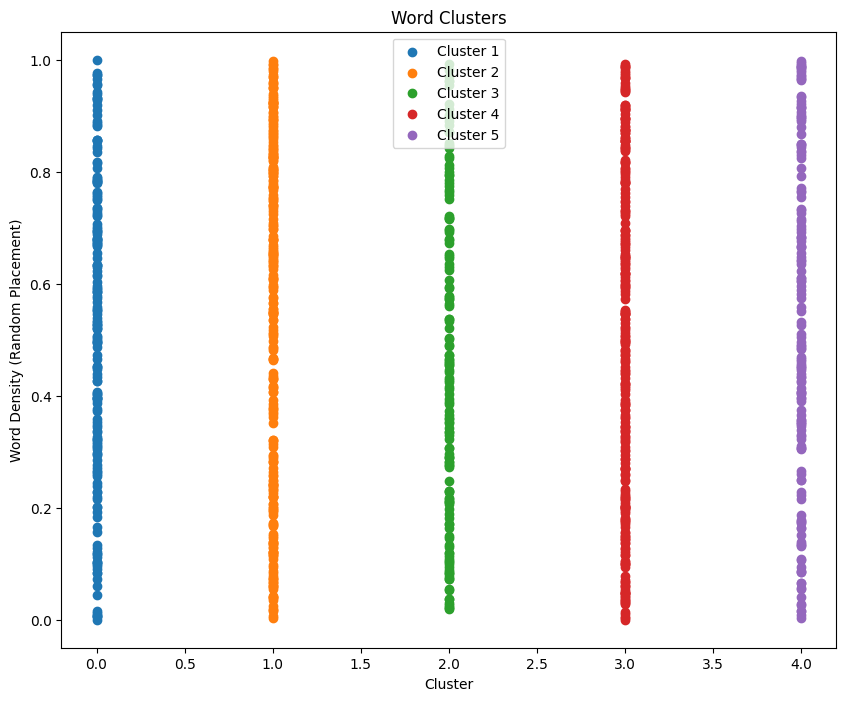

In [ ]:
# Visualizinging the clustered words
plt.figure(figsize=(10, 8))

# Ploting each word with its cluster
for i in range(num_clusters):
    cluster_words = [words[j] for j in range(len(words)) if clusters[j] == i]
    plt.scatter([i] * len(cluster_words), np.random.rand(len(cluster_words)), label=f'Cluster {i + 1}')

plt.title("Word Clusters")
plt.xlabel("Cluster")
plt.ylabel("Word Density (Random Placement)")
plt.legend()
plt.show()

---
## **DISPLAYING COSINE SIMILARITY BETWEEN WORDS**

In [ ]:
# Randomly choosing 10 words from your vocabulary
words_to_check = random.sample(list(model.wv.index_to_key), 10)

# Getting embeddings for the selected words
chosen_word_embeddings = np.array([model.wv[word] for word in words_to_check])

# Computing cosine similarity between each pair of selected words
cos_sim = cosine_similarity(chosen_word_embeddings)

# Creating a DataFrame to display the similarity matrix with word names
cos_sim_df = pd.DataFrame(cos_sim, index=words_to_check, columns=words_to_check)

In [ ]:
# Printing the cosine similarity matrix with word names
print("Cosine Similarity Matrix for 10 Random Words:")
print(cos_sim_df)


Cosine Similarity Matrix for 10 Random Words:
             implement  execution   journey  established  currency  objective  \
implement     1.000000   0.984303  0.986893     0.987429  0.990356   0.991186   
execution     0.984303   1.000000  0.966169     0.981447  0.985098   0.988038   
journey       0.986893   0.966169  1.000000     0.985500  0.987745   0.977150   
established   0.987429   0.981447  0.985500     1.000000  0.994406   0.986469   
currency      0.990356   0.985098  0.987745     0.994406  1.000000   0.987396   
objective     0.991186   0.988038  0.977150     0.986469  0.987396   1.000000   
maintaining   0.987608   0.971886  0.986980     0.985549  0.987858   0.979779   
owned         0.990521   0.978259  0.983777     0.987330  0.987199   0.986235   
same          0.987612   0.975620  0.979586     0.983745  0.987138   0.983317   
sector        0.993784   0.986217  0.987581     0.991177  0.993612   0.990449   

             maintaining     owned      same    sector  
imple

___
## **Analyzing Cosine Similarity Matrix for 10 Random Words:**

Insights from this cosine similarity matrix:

1. **High Similarity Scores Across Words:**
   - Matrix is showing strong similarities between most word pairs, with scores close to **1.0**. For example:
     - **implement** and **objective**: 0.991186
     - **currency`** and **`sector`**: 0.993612
     - **established`** and **`sector`**: 0.991177
   - These high similarity scores imply that the model has effectively learned that these words frequently appear together in similar contexts.

2. **Contextual Relationships:**
   - **Action-related terms**: Words like **`implement`**, **`execution`**, and **objective`** show high similarity with each other. These words are often used in contexts of planning, strategy, or business goals, which is why they are closely related.

   - **Business and Finance-related terms**: **`currency`** and **`sector`** show strong similarity scores (0.993612). These words are highly likely to appear in business, finance, or economic contexts.
   - **Abstract concepts**: Words such as **`journey`**, **`established`**, and **same`** indicate that the model recognizes the abstract relationships between concepts like progress, consistency, and stability.

___

____
___
# **SOME STEPS DELIVERABLES (EMBEDDING FILES)**

### **SAVING EMBEDDING FILE IN TXT FORMAT**

In [ ]:
# Saving the embeddings in .txt format
with open('/content/word_embeddings.txt', 'w') as f:
    for word in model.wv.index_to_key:
        embedding = model.wv[word]
        embedding_str = ' '.join(map(str, embedding))  # Convert vector to space-separated string
        f.write(f"{word} {embedding_str}\n")


## **Brief Summary of the Embedding Structure**


**Embedding Dimensions:**

- Each word in the vocabulary is represented as a vector in a 30-dimensional space.
- These vectors capture semantic information, such as the meanings and relationships between words, based on their context in the provided text.

**Vocabulary:**

- The vocabulary is the set of all unique words that appear in the 10 pages of text you have processed.In our case Vocabulary size is 1030.

- Each word in the vocabulary is mapped to a vector, and these vectors are learned through the Word2Vec model based on the surrounding context.

**Contextual Representation:**

- Words that appear in similar contexts (e.g., currency and sector) will have similar vector representations. This is because Word2Vec captures context-based relationships between words.

**Vector Storage:**

- The embeddings are stored in a matrix, where each row corresponds to a word in the vocabulary, and each column represents a dimension of the embedding vector.
- For example, if the word "currency" is represented by the vector [0.12, -0.34, 0.45, ..., 0.09], this 30-dimensional vector captures the relationship between "currency" and other words.

---
## **SAMPLE EMBEDDINGS FOR RANDOM 10 WORDS**

In [ ]:
# SelectING 10 random words from the vocabulary
random_words = random.sample(model.wv.index_to_key, 10)

# Displaying the embeddings for these 10 random words
print("Sample Embeddings (10 Random Words):")
for word in random_words:
    print(f"Word: {word}")
    print(f"Embedding: {model.wv[word]}")
    print("-" * 60)


Sample Embeddings (10 Random Words):
Word: strengthened
Embedding: [ 0.00490565 -0.11494753  0.24013972 -0.00080101  0.10978623  0.05176433
  0.16344883 -0.04646688 -0.18442632  0.05423162  0.21331507  0.14975323
 -0.00716059 -0.17193349 -0.03062605 -0.03965606  0.15270995  0.11985569
 -0.21212894 -0.04154989  0.0037454   0.04426083  0.04657128  0.25167033
  0.13959724  0.18188645  0.10671232  0.06016602  0.08210084 -0.33444455]
------------------------------------------------------------
Word: fold
Embedding: [-0.02926563 -0.13577804  0.23357655 -0.00860145  0.11632523  0.02260215
  0.14711411 -0.0219481  -0.17938079  0.04976476  0.14986755  0.12405153
  0.00086351 -0.13022041 -0.0212956  -0.03814428  0.09175972  0.11108791
 -0.16423765  0.00351035 -0.00528524  0.00923258  0.08566193  0.22237599
  0.09923024  0.13801691  0.14009854  0.09235548  0.0505847  -0.3123818 ]
------------------------------------------------------------
Word: performing
Embedding: [-0.00266917 -0.10290197  0.1

___
### **BRIEF SUMMARY OF SAMPLE EMBEDDINGS**

**Embedding Dimensions:**
- Each of 10 sample words is represented as a vector with 30 dimensions, capturing its semantic properties and relationships to other words.
- These vectors are numerical representations that reflect the meaning and context of words within the dataset.


 **Contextual Representation:**
- The embeddings capture the relationships between words based on their surrounding context in the text. Words that are used in similar contexts will have vectors that are closer in distance to each other in the embedding space.
- For example, "independent" and "warranted" have vectors with similar characteristics because of the semantic context in which they may appear.

**Vector Storage:**
- The embeddings are stored as a matrix where each row represents a word in the vocabulary, and each column corresponds to one of the 30 dimensions. Each vector for a word is learned from the surrounding context of that word in the text.For example:
The word "strengthened" is represented by the vector [0.00490565, -0.11494753, 0.24013972, ..., -0.33444455]. This 30-dimensional vector is unique to the word and captures its semantic meaning relative to the context in which it appears in the training text.

**Semantic Similarity:**
- Words that are related or have similar meanings tend to have similar embeddings. For example, "performing" and "undertake" may appear in similar contexts and therefore have vectors that are relatively closer to each other.
***
***

***